In [1]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd

def load_res_data(res_path = RES_PATH,file_name="new_feature_1214.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [2]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["FF"])
resource_origin_data_lut=resource_origin_data_lut.drop("LUT",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)

In [3]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 229
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ARITLSHIFT                 212 non-null    int64  
 1   ARITLSHIFT_PORT_NUM        212 non-null    int64  
 2   ARITLSHIFT_PORT_WIDTH      212 non-null    int64  
 3   ARITLSHIFT_VALUE           212 non-null    int64  
 4   ARITRSHIFT                 212 non-null    int64  
 5   ARITRSHIFT_PORT_NUM        212 non-null    int64  
 6   ARITRSHIFT_PORT_WIDTH      212 non-null    int64  
 7   ARITRSHIFT_VALUE           212 non-null    int64  
 8   AlwaysConstructs           212 non-null    int64  
 9   AssignLHSPortNum           212 non-null    int64  
 10  AssignLHSWidth             212 non-null    int64  
 11  AssignRHSPortNum           212 non-null    int64  
 12  AssignRHSWidth             212 non-null    int64  
 13  AssignStmts                212 non-null    int64  

In [4]:
resource_origin_data_lut.describe()

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH,FF
count,212.0,212.0,212.0,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.0,0.0,0.0,0.0,0.113208,0.070755,0.674528,0.386792,2.287736,2.924528,...,0.523585,3.886792,0.495283,0.561321,3.783019,124.339623,0.250000,2.844340,13.976415,22.627358
std,0.0,0.0,0.0,0.0,0.758156,0.524014,4.576129,2.801728,3.237406,10.205192,...,2.526525,8.233927,4.434353,4.076405,5.397041,705.919378,2.236863,8.446055,52.403144,59.159899
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,4.500000
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,4.000000,0.000000,0.000000,4.000000,31.000000,0.000000,1.250000,2.000000,26.000000
max,0.0,0.0,0.0,0.0,8.000000,7.000000,56.000000,28.000000,24.000000,127.000000,...,31.000000,55.000000,62.000000,56.000000,32.000000,8202.000000,32.000000,65.000000,575.000000,768.000000


In [5]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["LUT"].sort_values(ascending=False)

KeyError: 'LUT'

In [7]:
#特征优化
resource_lut = resource_origin_data_lut["FF"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("FF",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [8]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [9]:
X_valid_backup = X_valid

In [10]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [11]:
#深度学习

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [12]:
X_train.shape

(126, 59)

In [13]:
keras.backend.clear_session()
#input_ = keras.layers.Input(shape=X_train.shape[1:])
#hidden1 = keras.layers.Dense(59, activation="relu")(input_)
#hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
#concat = keras.layers.concatenate([input_, hidden2])
#output = keras.layers.Dense(1)(concat)
#model = keras.models.Model(inputs=[input_], outputs=[output])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)

In [14]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    #keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(1)
])

In [24]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid))

Epoch 1/1000
4/4 [==============================] - 0s 26ms/step - loss: 48.1367 - val_loss: 633.6571
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 47.2324 - val_loss: 624.5901
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 47.2766 - val_loss: 638.8510
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 47.2201 - val_loss: 624.0401
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 47.3379 - val_loss: 614.9003
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 46.8905 - val_loss: 638.0994
Epoch 7/1000
4/4 [==============================] - 0s 7ms/step - loss: 46.1754 - val_loss: 623.1658
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 46.6706 - val_loss: 627.9679
Epoch 9/1000
4/4 [==============================] - 0s 9ms/step - loss: 46.2074 - val_loss: 619.4099
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 46.8517 - val_los

4/4 [==============================] - 0s 7ms/step - loss: 33.7392 - val_loss: 628.5367
Epoch 82/1000
4/4 [==============================] - 0s 6ms/step - loss: 33.9853 - val_loss: 631.3134
Epoch 83/1000
4/4 [==============================] - 0s 6ms/step - loss: 33.5712 - val_loss: 630.1542
Epoch 84/1000
4/4 [==============================] - 0s 8ms/step - loss: 33.5892 - val_loss: 632.5884
Epoch 85/1000
4/4 [==============================] - 0s 6ms/step - loss: 33.3364 - val_loss: 624.5475
Epoch 86/1000
4/4 [==============================] - 0s 6ms/step - loss: 33.7592 - val_loss: 628.6578
Epoch 87/1000
4/4 [==============================] - 0s 6ms/step - loss: 32.7536 - val_loss: 631.8531
Epoch 88/1000
4/4 [==============================] - ETA: 0s - loss: 44.32 - 0s 6ms/step - loss: 33.0308 - val_loss: 634.6805
Epoch 89/1000
4/4 [==============================] - 0s 8ms/step - loss: 32.4477 - val_loss: 625.1241
Epoch 90/1000
4/4 [==============================] - 0s 7ms/step - loss:

4/4 [==============================] - 0s 6ms/step - loss: 25.0298 - val_loss: 619.1063
Epoch 160/1000
4/4 [==============================] - 0s 6ms/step - loss: 24.6532 - val_loss: 615.7574
Epoch 161/1000
4/4 [==============================] - 0s 6ms/step - loss: 24.7950 - val_loss: 609.1979
Epoch 162/1000
4/4 [==============================] - 0s 6ms/step - loss: 24.6269 - val_loss: 617.8691
Epoch 163/1000
4/4 [==============================] - 0s 6ms/step - loss: 24.4972 - val_loss: 614.8824
Epoch 164/1000
4/4 [==============================] - 0s 6ms/step - loss: 24.1319 - val_loss: 619.1309
Epoch 165/1000
4/4 [==============================] - 0s 7ms/step - loss: 24.2422 - val_loss: 619.6315
Epoch 166/1000
4/4 [==============================] - 0s 7ms/step - loss: 24.3370 - val_loss: 612.2744
Epoch 167/1000
4/4 [==============================] - 0s 6ms/step - loss: 24.1357 - val_loss: 615.5909
Epoch 168/1000
4/4 [==============================] - 0s 7ms/step - loss: 24.4838 - val_

4/4 [==============================] - 0s 6ms/step - loss: 18.8227 - val_loss: 616.5960
Epoch 239/1000
4/4 [==============================] - 0s 7ms/step - loss: 18.7497 - val_loss: 608.0222
Epoch 240/1000
4/4 [==============================] - 0s 6ms/step - loss: 18.7265 - val_loss: 610.1851
Epoch 241/1000
4/4 [==============================] - 0s 6ms/step - loss: 18.6002 - val_loss: 608.2240
Epoch 242/1000
4/4 [==============================] - 0s 6ms/step - loss: 18.4529 - val_loss: 610.8840
Epoch 243/1000
4/4 [==============================] - 0s 6ms/step - loss: 18.4547 - val_loss: 612.1091
Epoch 244/1000
4/4 [==============================] - 0s 6ms/step - loss: 18.4627 - val_loss: 608.8085
Epoch 245/1000
4/4 [==============================] - 0s 6ms/step - loss: 18.5317 - val_loss: 613.9642
Epoch 246/1000
4/4 [==============================] - 0s 5ms/step - loss: 18.5361 - val_loss: 609.2682
Epoch 247/1000
4/4 [==============================] - 0s 7ms/step - loss: 18.2928 - val_

4/4 [==============================] - 0s 6ms/step - loss: 14.6905 - val_loss: 615.4351
Epoch 318/1000
4/4 [==============================] - 0s 6ms/step - loss: 14.8203 - val_loss: 614.5372
Epoch 319/1000
4/4 [==============================] - 0s 6ms/step - loss: 14.7232 - val_loss: 614.9229
Epoch 320/1000
4/4 [==============================] - 0s 6ms/step - loss: 14.6821 - val_loss: 613.1473
Epoch 321/1000
4/4 [==============================] - 0s 6ms/step - loss: 14.8104 - val_loss: 613.5784
Epoch 322/1000
4/4 [==============================] - 0s 7ms/step - loss: 14.5192 - val_loss: 609.7369
Epoch 323/1000
4/4 [==============================] - 0s 6ms/step - loss: 14.5930 - val_loss: 618.0742
Epoch 324/1000
4/4 [==============================] - 0s 6ms/step - loss: 14.6526 - val_loss: 617.0938
Epoch 325/1000
4/4 [==============================] - 0s 7ms/step - loss: 14.4949 - val_loss: 616.4371
Epoch 326/1000
4/4 [==============================] - 0s 6ms/step - loss: 14.4853 - val_

4/4 [==============================] - 0s 8ms/step - loss: 12.2009 - val_loss: 622.6974
Epoch 397/1000
4/4 [==============================] - 0s 6ms/step - loss: 11.9077 - val_loss: 621.6516
Epoch 398/1000
4/4 [==============================] - 0s 6ms/step - loss: 12.1390 - val_loss: 621.1198
Epoch 399/1000
4/4 [==============================] - 0s 6ms/step - loss: 11.8684 - val_loss: 623.2460
Epoch 400/1000
4/4 [==============================] - 0s 8ms/step - loss: 11.8124 - val_loss: 620.7429
Epoch 401/1000
4/4 [==============================] - 0s 6ms/step - loss: 12.1730 - val_loss: 622.2730
Epoch 402/1000
4/4 [==============================] - 0s 6ms/step - loss: 11.7915 - val_loss: 621.3123
Epoch 403/1000
4/4 [==============================] - 0s 4ms/step - loss: 11.8758 - val_loss: 620.4111
Epoch 404/1000
4/4 [==============================] - 0s 8ms/step - loss: 11.9628 - val_loss: 619.7501
Epoch 405/1000
4/4 [==============================] - 0s 7ms/step - loss: 11.7609 - val_

Epoch 475/1000
4/4 [==============================] - 0s 10ms/step - loss: 10.0164 - val_loss: 640.9700
Epoch 476/1000
4/4 [==============================] - 0s 6ms/step - loss: 10.0407 - val_loss: 643.1230
Epoch 477/1000
4/4 [==============================] - 0s 7ms/step - loss: 9.9639 - val_loss: 638.5853
Epoch 478/1000
4/4 [==============================] - 0s 6ms/step - loss: 9.9320 - val_loss: 640.7221
Epoch 479/1000
4/4 [==============================] - 0s 3ms/step - loss: 9.9151 - val_loss: 639.2511
Epoch 480/1000
4/4 [==============================] - 0s 5ms/step - loss: 9.8792 - val_loss: 640.1595
Epoch 481/1000
4/4 [==============================] - 0s 7ms/step - loss: 9.7898 - val_loss: 641.0893
Epoch 482/1000
4/4 [==============================] - 0s 7ms/step - loss: 9.8406 - val_loss: 640.9843
Epoch 483/1000
4/4 [==============================] - 0s 8ms/step - loss: 9.7986 - val_loss: 638.6730
Epoch 484/1000
4/4 [==============================] - 0s 6ms/step - loss: 9.817

Epoch 555/1000
4/4 [==============================] - 0s 6ms/step - loss: 8.5288 - val_loss: 659.9944
Epoch 556/1000
4/4 [==============================] - 0s 6ms/step - loss: 8.5407 - val_loss: 657.8748
Epoch 557/1000
4/4 [==============================] - 0s 6ms/step - loss: 8.4385 - val_loss: 657.5801
Epoch 558/1000
4/4 [==============================] - 0s 6ms/step - loss: 8.4354 - val_loss: 657.3433
Epoch 559/1000
4/4 [==============================] - 0s 6ms/step - loss: 8.5227 - val_loss: 655.9597
Epoch 560/1000
4/4 [==============================] - 0s 6ms/step - loss: 8.4748 - val_loss: 659.5253
Epoch 561/1000
4/4 [==============================] - ETA: 0s - loss: 5.793 - 0s 7ms/step - loss: 8.3957 - val_loss: 659.4715
Epoch 562/1000
4/4 [==============================] - 0s 6ms/step - loss: 8.3236 - val_loss: 660.2090
Epoch 563/1000
4/4 [==============================] - 0s 7ms/step - loss: 8.3686 - val_loss: 661.3177
Epoch 564/1000
4/4 [==============================] - ETA:

4/4 [==============================] - 0s 7ms/step - loss: 7.3207 - val_loss: 677.3892
Epoch 635/1000
4/4 [==============================] - 0s 8ms/step - loss: 7.3430 - val_loss: 678.0214
Epoch 636/1000
4/4 [==============================] - ETA: 0s - loss: 5.336 - 0s 6ms/step - loss: 7.4033 - val_loss: 678.3367
Epoch 637/1000
4/4 [==============================] - 0s 6ms/step - loss: 7.3499 - val_loss: 679.6842
Epoch 638/1000
4/4 [==============================] - 0s 6ms/step - loss: 7.3735 - val_loss: 680.9247
Epoch 639/1000
4/4 [==============================] - 0s 6ms/step - loss: 7.4145 - val_loss: 680.2146
Epoch 640/1000
4/4 [==============================] - 0s 6ms/step - loss: 7.2772 - val_loss: 680.0926
Epoch 641/1000
4/4 [==============================] - 0s 7ms/step - loss: 7.2725 - val_loss: 680.6774
Epoch 642/1000
4/4 [==============================] - 0s 7ms/step - loss: 7.4042 - val_loss: 682.0178
Epoch 643/1000
4/4 [==============================] - 0s 6ms/step - loss:

Epoch 713/1000
4/4 [==============================] - 0s 3ms/step - loss: 6.4960 - val_loss: 702.3168
Epoch 714/1000
4/4 [==============================] - 0s 7ms/step - loss: 6.4287 - val_loss: 701.6616
Epoch 715/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.4702 - val_loss: 705.2216
Epoch 716/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.4440 - val_loss: 703.4961
Epoch 717/1000
4/4 [==============================] - ETA: 0s - loss: 6.345 - 0s 6ms/step - loss: 6.5435 - val_loss: 701.4037
Epoch 718/1000
4/4 [==============================] - 0s 7ms/step - loss: 6.4425 - val_loss: 705.5456
Epoch 719/1000
4/4 [==============================] - 0s 9ms/step - loss: 6.4917 - val_loss: 703.8859
Epoch 720/1000
4/4 [==============================] - 0s 2ms/step - loss: 6.4064 - val_loss: 703.1008
Epoch 721/1000
4/4 [==============================] - 0s 6ms/step - loss: 6.4031 - val_loss: 704.4382
Epoch 722/1000
4/4 [==============================] - 0s 6

4/4 [==============================] - 0s 8ms/step - loss: 5.9037 - val_loss: 729.2621
Epoch 793/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.7948 - val_loss: 729.4286
Epoch 794/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.7542 - val_loss: 728.3315
Epoch 795/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.8723 - val_loss: 730.0951
Epoch 796/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.7450 - val_loss: 728.7808
Epoch 797/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.8263 - val_loss: 728.5262
Epoch 798/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.8103 - val_loss: 728.5910
Epoch 799/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.7197 - val_loss: 728.8879
Epoch 800/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.6761 - val_loss: 730.6088
Epoch 801/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.6930 - val_loss: 730.

Epoch 872/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.2808 - val_loss: 751.6630
Epoch 873/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.2036 - val_loss: 749.1241
Epoch 874/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.3636 - val_loss: 752.8690
Epoch 875/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.1332 - val_loss: 753.6144
Epoch 876/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.1515 - val_loss: 751.7013
Epoch 877/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.1404 - val_loss: 753.9838
Epoch 878/1000
4/4 [==============================] - 0s 7ms/step - loss: 5.2240 - val_loss: 750.5113
Epoch 879/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.1863 - val_loss: 751.6108
Epoch 880/1000
4/4 [==============================] - 0s 10ms/step - loss: 5.3131 - val_loss: 751.7664
Epoch 881/1000
4/4 [==============================] - 0s 6ms/step - loss: 5.1248 

4/4 [==============================] - 0s 7ms/step - loss: 4.6776 - val_loss: 771.6894
Epoch 953/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.7166 - val_loss: 772.5093
Epoch 954/1000
4/4 [==============================] - 0s 7ms/step - loss: 4.6243 - val_loss: 773.7936
Epoch 955/1000
4/4 [==============================] - 0s 7ms/step - loss: 4.6085 - val_loss: 775.7777
Epoch 956/1000
4/4 [==============================] - 0s 8ms/step - loss: 4.6811 - val_loss: 773.7304
Epoch 957/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.6553 - val_loss: 771.9727
Epoch 958/1000
4/4 [==============================] - 0s 8ms/step - loss: 4.6864 - val_loss: 773.7392
Epoch 959/1000
4/4 [==============================] - 0s 8ms/step - loss: 4.6711 - val_loss: 774.7418
Epoch 960/1000
4/4 [==============================] - 0s 6ms/step - loss: 4.6474 - val_loss: 771.7485
Epoch 961/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.6584 - val_loss: 775.

In [28]:
deep_predict = model.predict(X_valid)

In [29]:
rmse = np.sqrt(625.6510)
rmse

25.013016611356576

In [30]:
from sklearn.metrics import r2_score
r2_score(y_valid,deep_predict)

0.07866630739466318

In [90]:
X_valid_backup

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONIF,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH
1,0,0,0,0,0,0,0,0,3,3,...,3,3,5,0,0,6,55,0,5,50
74,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,2,64,0,0,0
195,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,4,26,0,0,0
64,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
114,0,0,0,0,0,0,0,0,3,0,...,0,0,6,0,0,2,26,0,0,0
106,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,3,3,0,0,0
8,0,0,0,0,7,0,0,28,1,7,...,0,0,0,0,0,8,92,0,7,90
209,0,0,0,0,0,0,0,0,17,30,...,5,5,35,0,0,18,63,1,47,194


In [110]:
y_valid

89       2.0
209     54.0
21      32.0
87       1.0
145      3.0
28       0.0
203    127.0
72     276.0
117      1.0
11      47.0
102     69.0
67       1.0
126     72.0
48       2.0
178     73.0
131    104.0
111      4.0
149     22.0
75      61.0
181      4.0
96     200.0
143      1.0
10      91.0
61       4.0
42       1.0
68     102.0
214     42.0
130      3.0
44       8.0
190     34.0
107     90.0
60      20.0
198      2.0
47       2.0
2      100.0
119      4.0
182     20.0
33      22.0
103      1.0
115      0.0
219     11.0
62       4.0
138      1.0
Name: LUT, dtype: float64

In [92]:
y_train_full

140      1.0
120     68.0
80      14.0
95       0.0
109    123.0
       ...  
118      0.0
17     170.0
104      1.0
195      0.0
114     44.0
Name: LUT, Length: 169, dtype: float64

In [26]:
plot_learning_curves(model, X_train_full, y_train_full)
plt.axis([0, 200, 0, 200])                         # not shown in the book
plt.show() 

1/1 [==============================] - 0s 4ms/step - loss: nan


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [111]:
predict = model.predict(X_valid)
predict

array([[-4.26856804e+00],
       [ 6.14976959e+01],
       [ 7.14575577e+01],
       [ 1.98475468e+00],
       [ 5.87914085e+00],
       [ 5.88872147e+00],
       [ 9.87386475e+01],
       [ 3.38187134e+02],
       [ 1.07103643e+01],
       [ 4.65599022e+01],
       [ 6.47305756e+01],
       [ 1.73598111e+00],
       [ 5.63512039e+01],
       [ 1.87781124e+01],
       [ 1.02937767e+02],
       [ 5.95165443e+01],
       [-2.63833046e+00],
       [ 9.45659332e+01],
       [ 7.27102585e+01],
       [ 4.62103844e+00],
       [ 2.21077612e+03],
       [-1.76898277e+00],
       [ 1.15266266e+02],
       [ 1.36818256e+01],
       [-1.79439914e+00],
       [ 1.24464516e+02],
       [ 3.08278275e+01],
       [ 6.07139778e+00],
       [ 3.37609787e+01],
       [ 2.21376076e+01],
       [ 1.62430725e+02],
       [ 2.72856026e+01],
       [ 1.37348976e+01],
       [ 1.87781124e+01],
       [ 1.26831169e+02],
       [ 1.32390499e+01],
       [ 1.33106308e+01],
       [ 4.01074257e+01],
       [ 1.9

In [112]:
y_valid

89       2.0
209     54.0
21      32.0
87       1.0
145      3.0
28       0.0
203    127.0
72     276.0
117      1.0
11      47.0
102     69.0
67       1.0
126     72.0
48       2.0
178     73.0
131    104.0
111      4.0
149     22.0
75      61.0
181      4.0
96     200.0
143      1.0
10      91.0
61       4.0
42       1.0
68     102.0
214     42.0
130      3.0
44       8.0
190     34.0
107     90.0
60      20.0
198      2.0
47       2.0
2      100.0
119      4.0
182     20.0
33      22.0
103      1.0
115      0.0
219     11.0
62       4.0
138      1.0
Name: LUT, dtype: float64

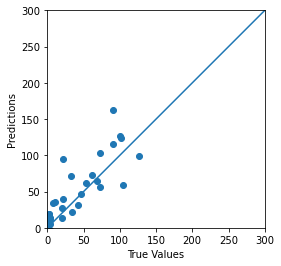

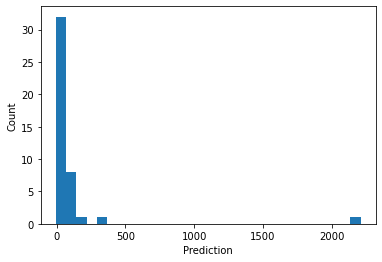

In [116]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_valid,predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,300]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(predict,bins=30)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.grid(False)
